## Latar Belakang Masalah
Kesehatan adalah hal yang berharga. Maka kebutuhan akan akses Kesehatan adalah mutlak diperlukan untuk menjamin keberlangsungan dan kesejahteraan masyarakat. Di masyarakat, ada beberapa penyakit yang berimbas luar biasa kepada penderita, salah satunya adalah penyakit Hepatitis.

Penyakit jantung jika tidak ditangani dengan segera dapat menyebabkan kematian. Oleh karena itu, Pemerintah berupaya menekan angka kematian penderita jantung dengan berbagai cara, salah satunya adalah dengan melakukan klasifikasi dan prediksi penyakit jantung. Data-data pasien dan kondisi Kesehatan pasien mulai digencarkan untuk direkam oleh Pemerintah, kemudian dataset itu digunakan menjadi bahan untuk model prediksi yang bisa membantu memprediksi dan mengklasifikasi Kesehatan pasien jantung.

Diantara alternatif solusi yang dikembangkan adalah metode Data Science yang menerapkan sebuah framework yang telah dipergunakan secara luas di dunia industri yaitu CRISP-DM framework. Framework ini selanjutnya diuraikan menjadi sebuah 11 urutan langkah2 antara lain: memahami tujuan bisnis, memahami tujuan teknis data science, memahami dan melakukan proses awal data, membuat skenario pemodelan, membuat model yang handal, mengevaluasi pemodelan, dan mereview proyek data science. Solusi tersebut digunakan untuk mengidentifikasi factor-faktor yang berkontribusi terhadap Kesehatan pasien jantung. Hasil prediksi tersebut selanjutnya digunakan oleh pasien dan pemerintah dalam meningkatkan harapan hidup pasien jantung.

Sumber data utama untuk keperluan pengembangan model prediktif ini adalah hasil perekaman alat terhadap pasien rumah sakit. Pengumpulan data melalui data rekam medis menghasilkan data berisi atribut: **`age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, num`**.

Disini, **num (0,1,2,3,4) merupakan variable dependent nya (label yang dicari)**.

## Tujuan Ujian Sertifikasi
Tujuan pemanfaatan metode Data Science yang utama didalam kasus ini adalah menghasilkan model prediktif yang akurat yang dapat dipergunakan untuk:
- mengidentifikasi variabel kunci yang mempengaruhi harapan hidup pasien jantung,
- dan memprediksi harapan hidup pasien hidup pasien jantung.

Dari hasil pemodelan prediktif dengan Data Science diharapkan dapat memberikan masukan kepada pihak rumah sakit dan Pemerintah untuk mengatasi salah satu masalah penting dibidang kesehatan tersebut.

## Terkait Dataset
Sumber data: https://archive.ics.uci.edu/dataset/45/heart+disease  
Jumlah Sampel Data: 303 records dengan 13 atributes

## dataset yang digunakan
**processed.cleveland.data**

## LOAD LIBRARY - GUNAKAN MASUKKAN LIBRARY PYTHON YANG AKAN ANDA GUNAKAN


In [ ]:
# Mendefinisikan variabel folder penyimpanan
folder_name = "/content/drive/My Drive/Colab Notebooks/BK/Sertifikasi Data Scientist"

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import sys
sys.path.append(f'{folder_name}')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

## BAB 1 - (J.62DMI00.004.1) Mengumpulkan data

### baca dataset

In [ ]:
# Baca dataset

column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df = pd.read_csv(f'{folder_name}/processed.cleveland.data', names=column_names, skipinitialspace=True, na_values="?")

# Tampilkan beberapa baris pertama dan informasi dataset
df.head(5)

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  num  
0    3.0  0.0   6.0    0  
1    2.0  3.0   3.0    2  
2    2.0  2.0   7.0    1  
3    3.0  0.0   3.0    0  
4    1.0  0.0   3.0    0

### baca informasi dataset

In [ ]:
#melihat informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


### baca informasi dataset terkait missing value

In [ ]:
# Hitung jumlah missing value per kolom
missing_values = df.isnull().sum()
print("\nJumlah missing value per kolom:")
print(missing_values)


Jumlah missing value per kolom:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


In [ ]:
# Hitung persentase missing value
missing_percentage = (missing_values / len(df)) * 100
print("\nPersentase missing value per kolom:")
print(missing_percentage)


Persentase missing value per kolom:
age         0.000000
sex         0.000000
cp          0.000000
trestbps    0.000000
chol        0.000000
fbs         0.000000
restecg     0.000000
thalach     0.000000
exang       0.000000
oldpeak     0.000000
slope       0.000000
ca          1.320132
thal        0.660066
num         0.000000
dtype: float64


## BAB 2 – (J.62DMI00.005.1) Menelaah data



### Analisis Statistik Deskriptif

In [ ]:
# Analisis Statistik Deskriptif

# Statistik deskriptif untuk variabel numerik
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
std      0.994971   22.875003    0.469794    1.161075    0.616226    0.937438   
min      0.000000   71.000000    0.000000    0.000000    1.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    2.000000    0.000000   
75%      2.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    3.000000    3.000000   

             thal         num  
count  301.000000  303.000000  
mean     4.734219    0.937294  
std      1.939706    1.228536  
min      3.000000    0.000000  
25%      3.000000    0.000000  
50%      3.000000    0.000000  
75%      7.000000    2.000000  
max      7.000000    4.000000

Penjelasan Statistik Deskriptif untuk Variabel Numerik:
- count: Jumlah data non-null di setiap kolom/ fitur
- mean: Rata-rata setiap kolom/ fitur
- std: Standar deviasi setiap kolom/ fitur
- min: Nilai minimum setiap kolom/ fitur
- 25%: Kuartil pertama (Q1) setiap kolom/ fitur
- 50%: Median atau kuartil kedua (Q2) setiap kolom/ fitur
- 75%: Kuartil ketiga (Q3) setiap kolom/ fitur
- max: Nilai maksimum setiap kolom/ fitur

Statistik deskriptif untuk variabel kategorikal tidak dilakukan karena dataset tidak memiliki variabel kategorikal.

### distribusi target variable

In [ ]:
# Distribusi target variable
df['num'].value_counts(normalize=True)

num
0    0.541254
1    0.181518
2    0.118812
3    0.115512
4    0.042904
Name: proportion, dtype: float64

penjelasan:
- Distribusi Kelas:
  - 54.125% dari sampel termasuk dalam kategori num 0.
  - 18.151% dari sampel termasuk dalam kategori num 1.
  - 11.881% dari sampel termasuk dalam kategori num 2.
  - 11.551% dari sampel termasuk dalam kategori num 3.
  - 4.290% dari sampel termasuk dalam kategori num 4.
- Ketidakseimbangan Kelas (Class Imbalance):
  - Dataset ini menunjukkan ketidakseimbangan kelas yang cukup signifikan, dimana mayoritas data dalam dataset termasuk dalam kategori num 0.
  - Beberapa algoritma, seperti Random Forest atau Gradient Boosting, cenderung lebih baik dalam menangani ketidakseimbangan kelas (disini, akan digunakan decision tree)

### visualisasi distribusi

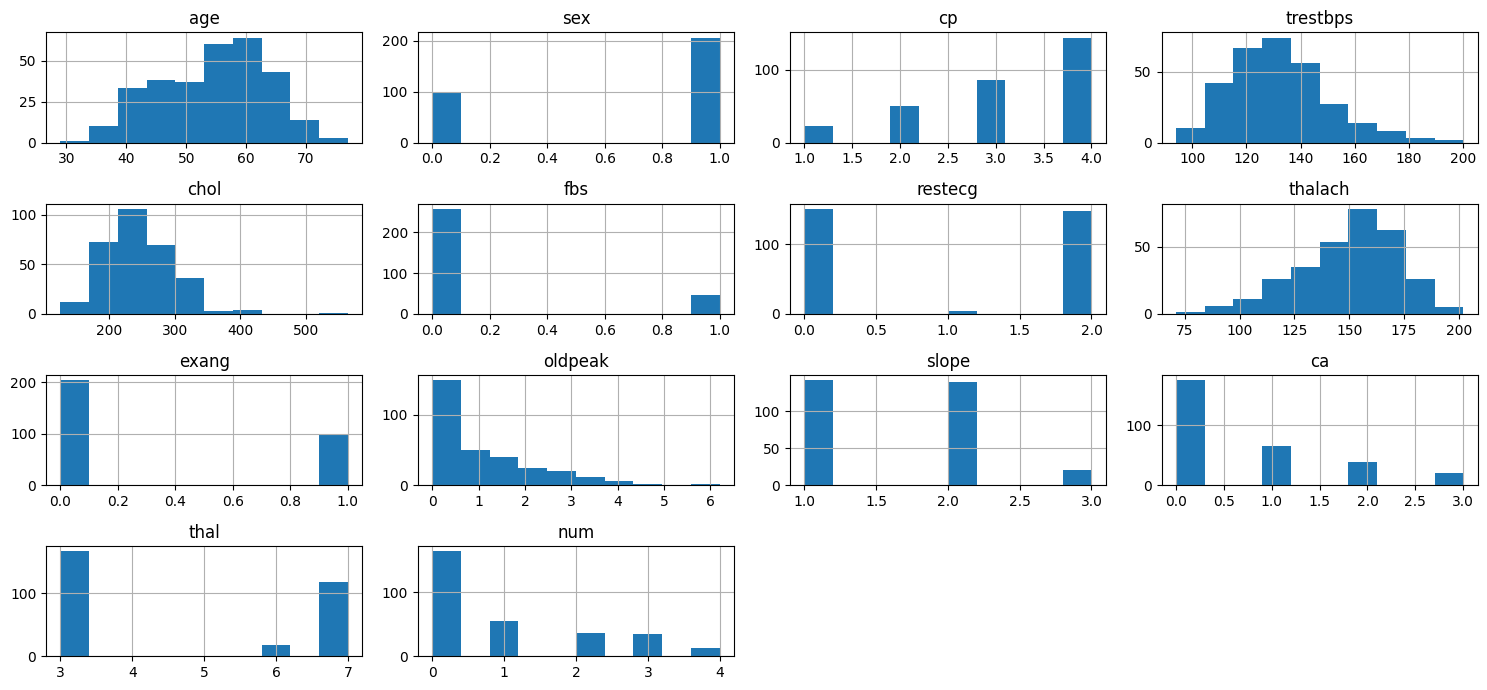

In [ ]:
# Histogram untuk variabel numerik
numeric_features = df.select_dtypes(include=[np.number]).columns
df[numeric_features].hist(figsize=(15, 7))
plt.tight_layout()
plt.show()

Sumbu X menunjukkan parameter setiap fitur, sedangkan Y menunjukkan frekuensi atau jumlah record pada dataset.
1.  Age (usia): Frekuensi tertinggi usia pasien berada di sekitar 50 -  tahun.
2. Sex (jenis kelamin, 1 = male; 0 = female): sebagian besar data (lebih dari 200) tergolong ke 1 (male/ laki-laki), sedangkan sisanya (sekitar 100) tergolong ke 0 (female/ perempuan).
3. cp (cheat pain type): tipe sakit dada yang dirasakan pasien. Paling banyak (lebih dari 100) yang dirasakan adalah tipe 4 (asymptomatic). Sisanya (tipe 1: typical angina, tipe 2: atypical angina, dan tipe 3: non-anginal pain) berada di angka dibawah 100.
4. trestbps (resting blood pressure in mm Hg): angka tekanan darah pasien saat istirahat dalam mmHg, dimana grafik menunjukkan sebagian besar berada di angka 110 - 145.
5. chol: serum cholestoral in mg/dl (kolestrol), dimana sebagian besar berada di angka sekitar 200.
6. fbs (fasting blood sugar > 120 mg/dl, 1 = true; 0 = false): angka gula darah pasien, grafik menunjukkan sebagian besar pasien memiliki gula darah dibawah 120 mg/dl.
7. restecg (resting electrocardiographic results): hasil jenis golongan elektrokardiografi pasien. Lebih dari 100 pasien tergolong 0 (normal
) dan 2 (memiliki kemungkinan hipertrofi ventrikel kiri). Sebagian kecil (sangat kecil mendekati 0) tergolong 1 (having ST-T wave abnormality).
8. thalach (maximum heart rate achieved): angka maksimal detak jantung pasien, cukup beragam di range 75 - 200.
9. exang (exercise induced angina 1 = yes; 0 = no): angina akibat olahraga, lebih dari 200 pasien tegolong 0.
10. oldpeak (ST depression induced by exercise relative to rest): tekanan ST disebabkan oleh olahraga dibandingkan dengan istirahat, lebih dari 100 pasien berada di rentang 0 - 1.
11. Slope (the slope of the peak exercise ST segment, 1: menanjak; 2 datar; 3: menurun): kemiringan segmen ST saat berolahraga, lebih dari 100 pasien tergolong 1 dan 2.
12. ca (number of major vessels (0-3) colored by flourosopy): jumlah pembuluh darah utama Lebih dari 100 pasien memiliki angka 0 - 0.25
13. thal (3 = normal; 6 = fixed defect; 7 = reversable defect), terbanyak adalah 3 (normal) lebih dari 100 pasien.
14. num (kategori target, diagnosis of heart disease (angiographic disease status). Sebagian besar tergolong ke kategori 0 (penyempitan diameter pembuluh darah < 50%).

In [ ]:
# Bar plot untuk variabel kategorikal
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    df[feature].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {feature}')
    plt.ylabel('Count')
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.show()

Tidak ada hasil visualisasi barplot variabel kategorikal karena dataset seluruhnya sudah bertipe numerik

### analisis korelasi

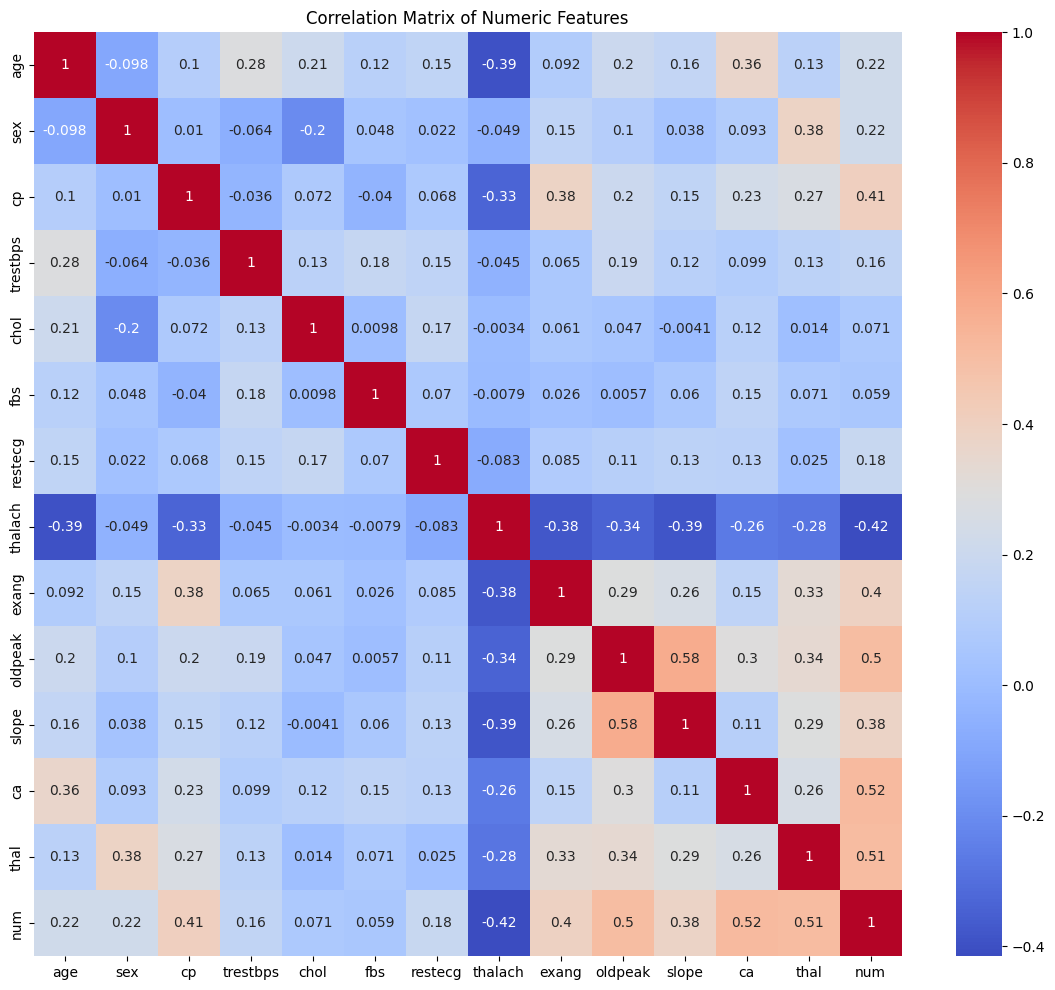

In [ ]:
# Korelasi antara variabel numerik
correlation_matrix = df[numeric_features].corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

Grafik diatas merupakan correlation matrix yang menunjukkan hubungan antar fitur numerik dalam dataset. Warna pada matriks menunjukkan kekuatan dan arah korelasi: merah berarti korelasi positif kuat, biru menunjukkan korelasi negatif kuat, dan warna lebih pucat menunjukkan korelasi lemah.
- Pada pada fitur target, num, terlihat bahwa ca (0.52), oldpeak (0.5), dan thal (0.51) memiliki korelasi positif yang cukup signifikan dengan num (target).
- Masih pada fitur target num, hubungannya dengan fitur lain seperti thalach detak jantung (-0.42) memiliki korelasi negatif, menunjukkan bahwa semakin tinggi nilai fitur tersebut (nilai dari fitur itu sendiri), semakin kecil kemungkinan terdeteksi penyakit jantung.


### Analisis Hubungan dengan Target Variable

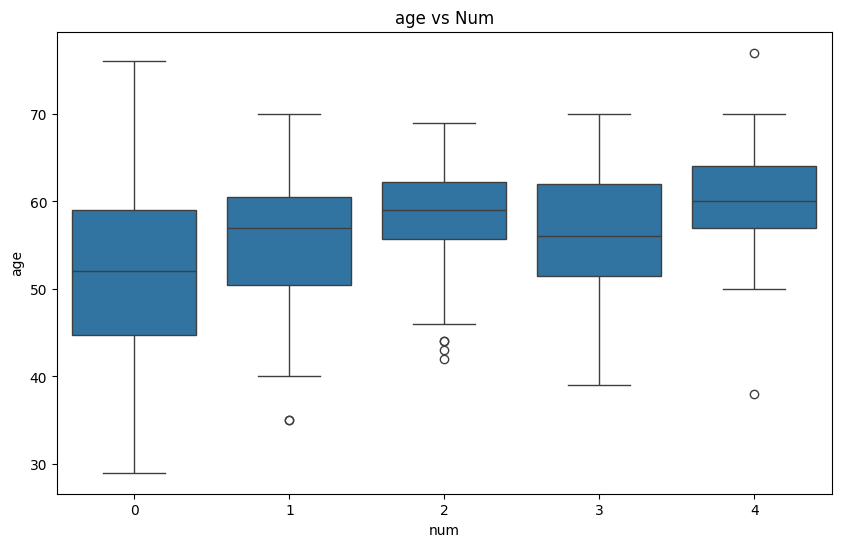

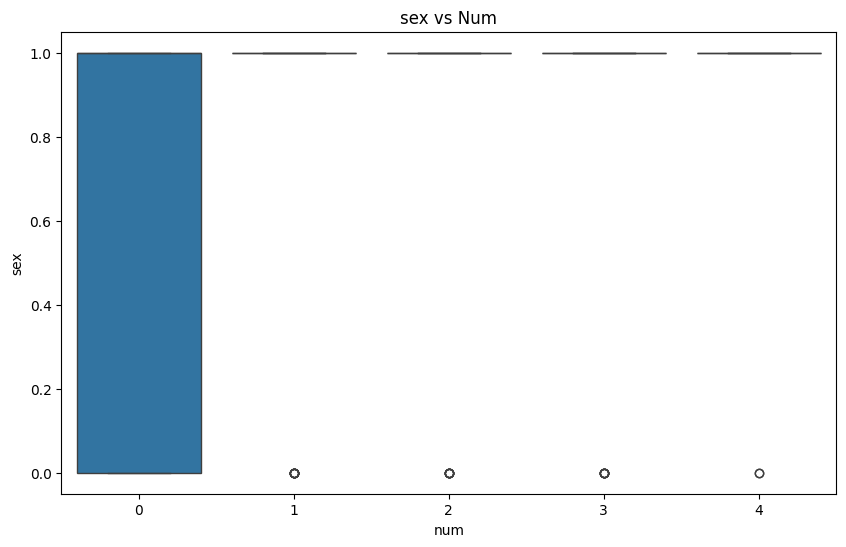

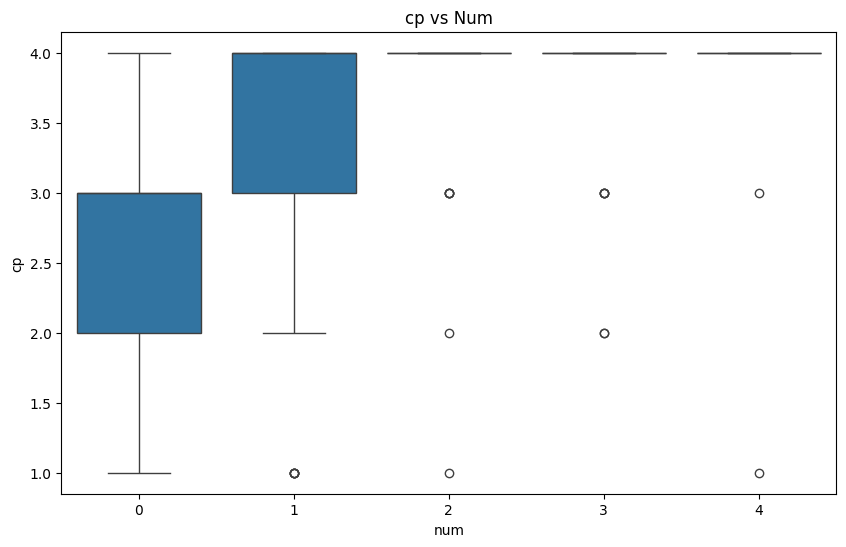

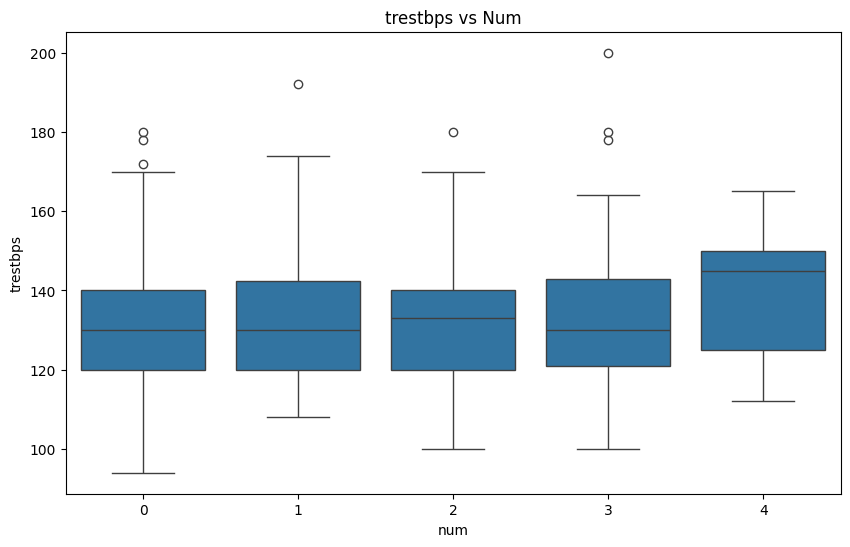

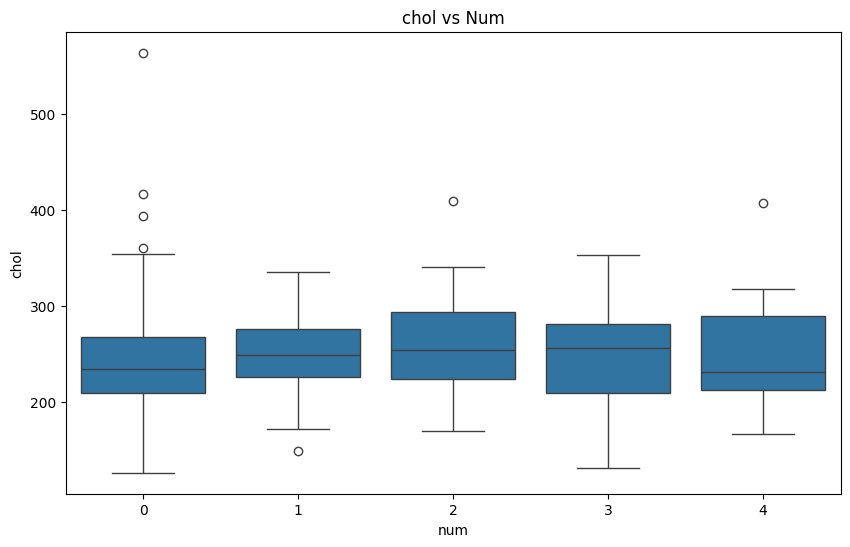

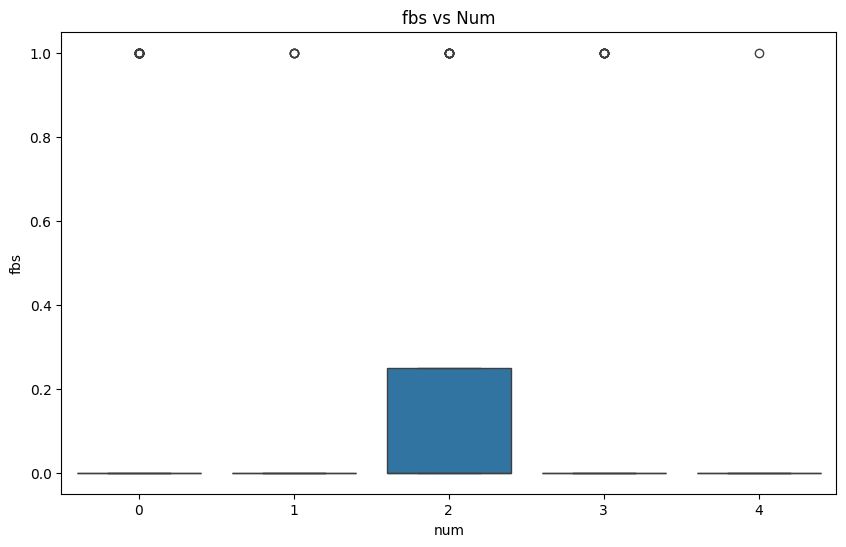

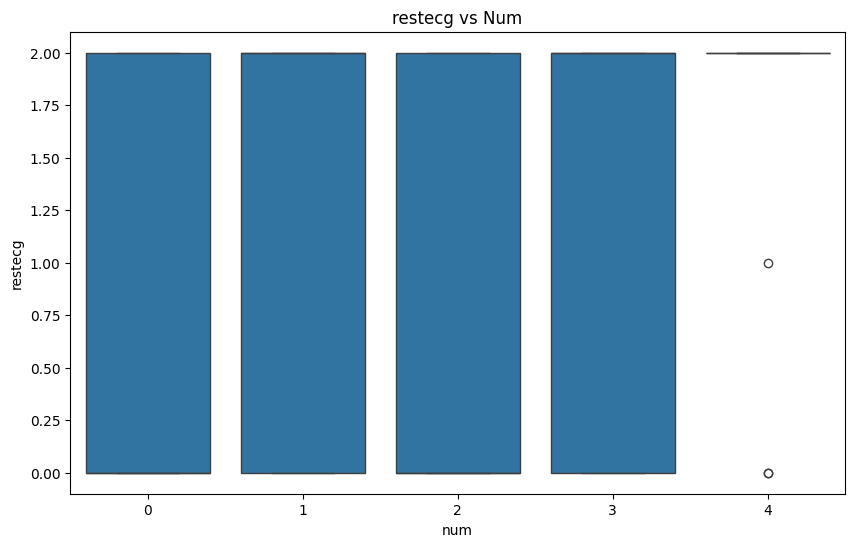

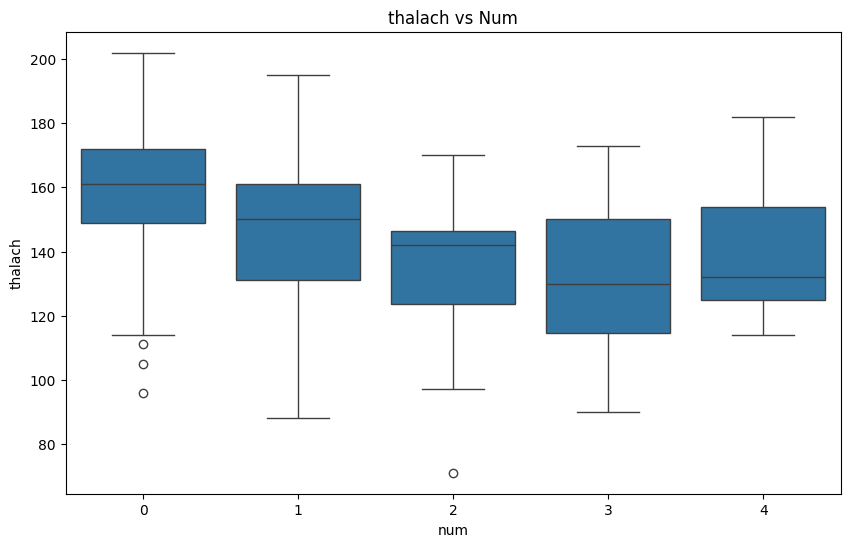

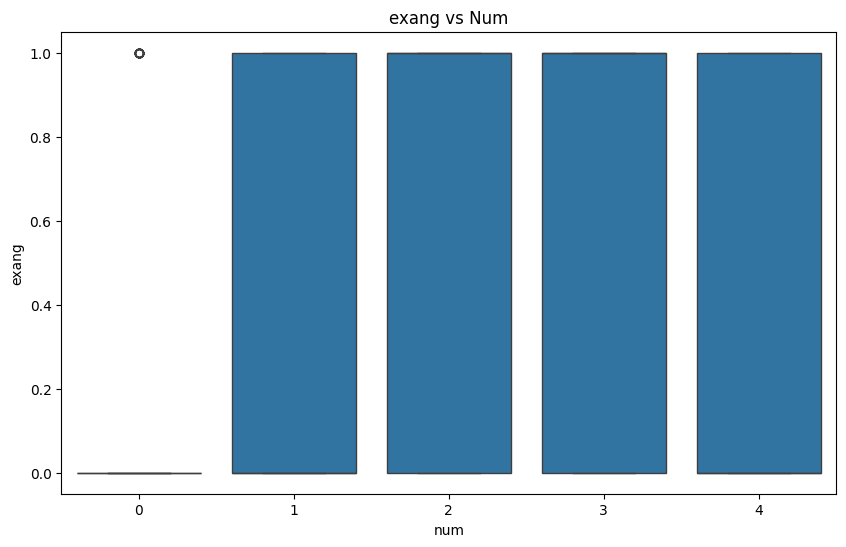

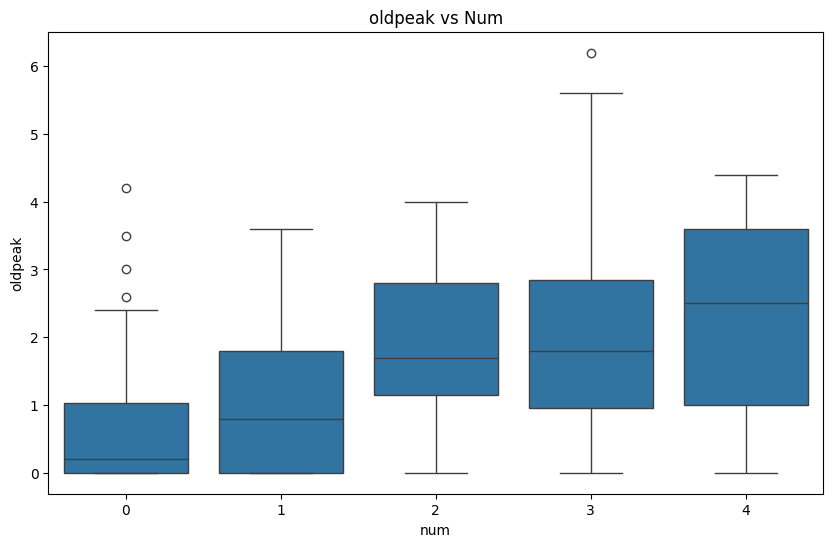

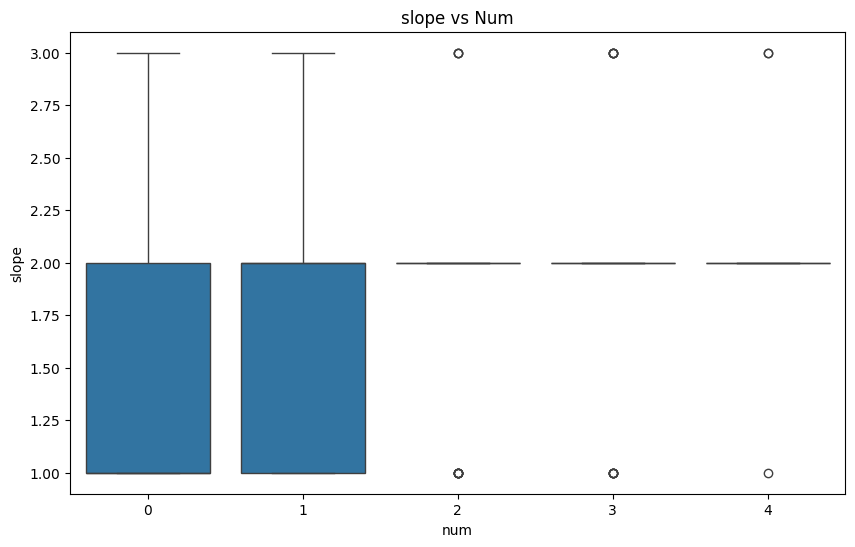

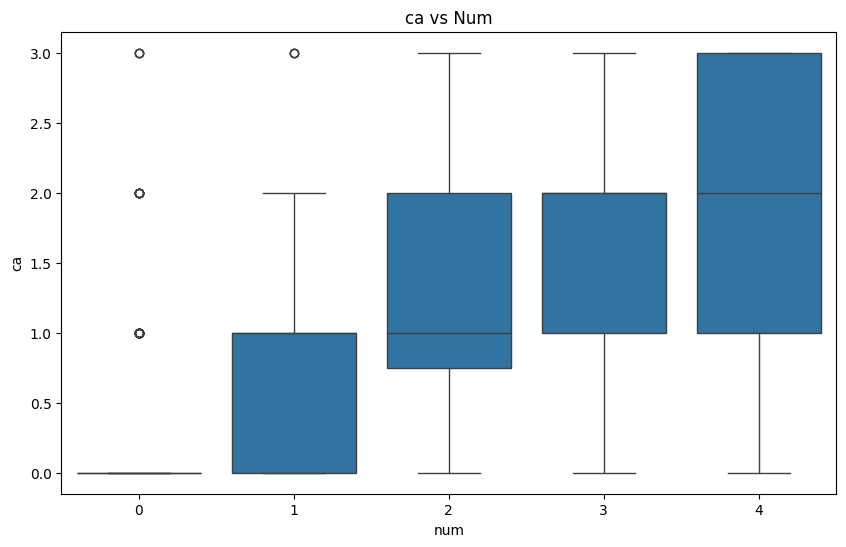

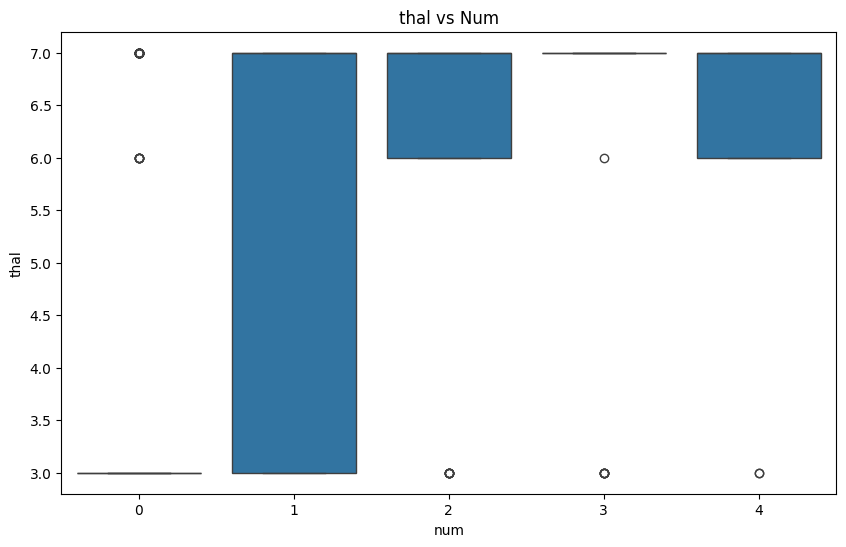

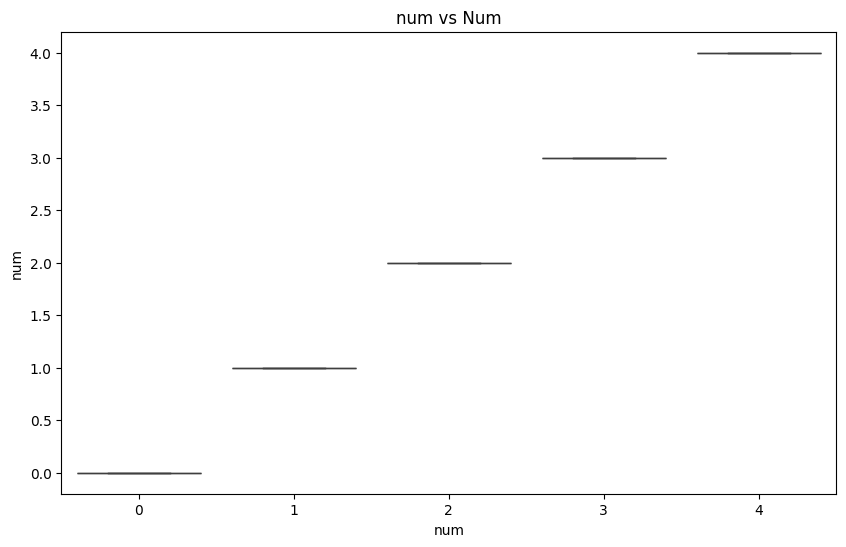

In [ ]:
# Boxplot numerik vs target
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='num', y=feature, data=df)
    plt.title(f'{feature} vs Num')
    plt.show()

Grafik-grafik tersebut adalah boxplot yang membandingkan distribusi antar fitur lain (di sumbu Y) terhadap num (di sumbu X).
- Kotak berwarna biru menunjukkan interquartile range (IQR), yakni **rentang data** antara kuartil pertama (Q1) dan kuartil ketiga (Q3). Ini merepresentasikan 50% data tengah dalam distribusi. Didalam kotak ini terdapat garis horizontal yang menunjukkan median atau nilai tengah.
- Garis vertikal di luar kotak, yang dikenal sebagai whiskers, menunjukkan nilai minimum dan maksimum data yang masih dianggap wajar
- Titik-titik diluar kotak disebut outliers, yaitu data yang berada di luar batas wajar, yang sering merepresentasikan nilai ekstrem yang berbeda dari pola umum data.
1. Age vs num
Usia pasien dalam dataset cukup beragam di setiap golongannya (0-4).

In [ ]:
# Stacked bar plot kategorikal vs target
for feature in categorical_features:
    if feature != 'class':
        plt.figure(figsize=(18, 10))
        df_temp = df.groupby([feature, 'class']).size().unstack()
        df_temp_perc = df_temp.div(df_temp.sum(axis=1), axis=0)
        df_temp_perc.plot(kind='bar', stacked=True)
        plt.title(f'{feature} vs class')
        plt.xlabel(feature)
        plt.ylabel('Percentage')
        plt.legend(title='class', loc='upper right')
        plt.xticks(rotation=45)
        plt.show()

Visualisasi kategorikal tidak mengeluarkan hasil karena tidak adanya variabel jenis kategorialm karena seluruh dataset bertipe numerik.

### Identifikasi Outlier

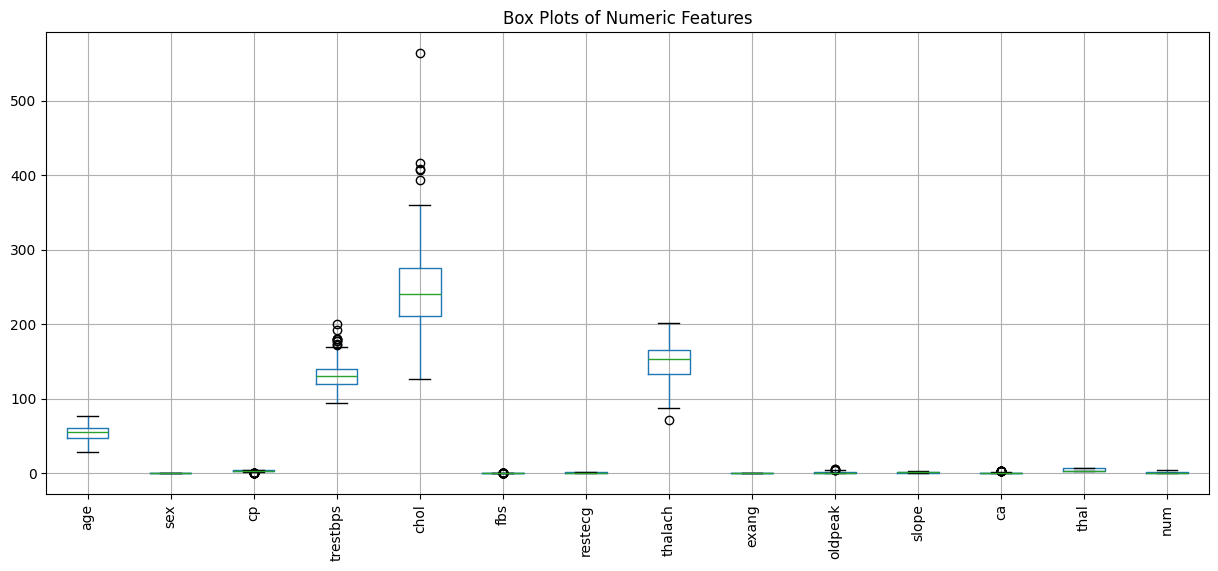

In [ ]:
# Box plot untuk mendeteksi outlier pada variabel numerik
plt.figure(figsize=(15, 6))
df[numeric_features].boxplot()
plt.title('Box Plots of Numeric Features')
plt.xticks(rotation=90)
plt.show()

Grafik di atas merupakan box plot yang menunjukkan distribusi fitur numerik dalam dataset. Setiap fitur ditampilkan secara terpisah di sumbu x, dengan nilai pada sumbu y. Dari grafik ini, terlihat bahwa fitur 'chol' memiliki rentang nilai yang jauh lebih besar dibandingkan fitur lainnya, dengan banyak outliers di atas 500. Sementara itu, fitur seperti 'sex', 'fbs', sampai 'thal' dan 'num' memiliki nilai yang sangat kecil atau stabil, kemungkinan menunjukkan variabilitas rendah. Fitur Customer Value juga memiliki sebaran kecil dengan beberapa outliers.


## BAB 3 – (J.62DMI00.006.1) memvalidasi data
**TIDAK PERLU MELAKUKAN CEK KONSISTENSI DATA**

### Periksa Missing Values

In [ ]:
# Hitung jumlah missing values
missing_values = df.isnull().sum()

# Hitung persentase missing values
missing_percentage = 100 * df.isnull().sum() / len(df)

# Gabungkan informasi missing values
missing_table = pd.concat([missing_values, missing_percentage], axis=1, keys=['Total', 'Percent'])

print(missing_table)

          Total   Percent
age           0  0.000000
sex           0  0.000000
cp            0  0.000000
trestbps      0  0.000000
chol          0  0.000000
fbs           0  0.000000
restecg       0  0.000000
thalach       0  0.000000
exang         0  0.000000
oldpeak       0  0.000000
slope         0  0.000000
ca            4  1.320132
thal          2  0.660066
num           0  0.000000


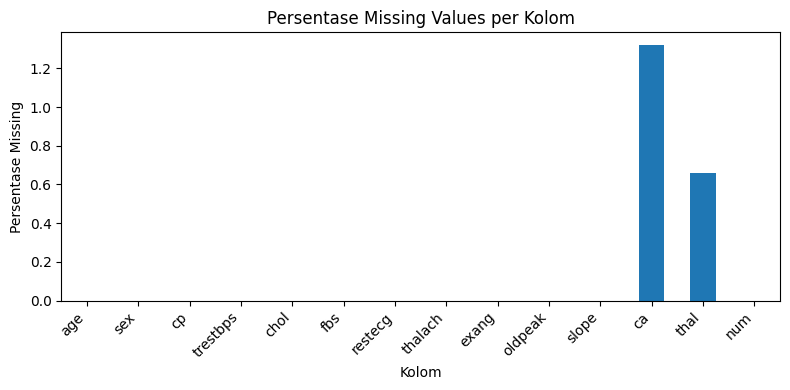

In [ ]:
# Visualisasi missing values
plt.figure(figsize=(8, 4))
missing_percentage.plot(kind='bar')
plt.title('Persentase Missing Values per Kolom')
plt.xlabel('Kolom')
plt.ylabel('Persentase Missing')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###Periksa duplikat

In [ ]:
# Hitung jumlah duplikat
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")

# Tampilkan beberapa baris duplikat (jika ada)
if duplicates > 0:
    print("\nContoh baris duplikat:")
    print(df[df.duplicated(keep=False)].head(10))

Jumlah baris duplikat: 0


### Validasi Tipe Data

In [ ]:
# Tampilkan tipe data setiap kolom
print(df.dtypes)

# Periksa apakah ada nilai non-numerik dalam kolom numerik
numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    non_numeric = df[pd.to_numeric(df[col], errors='coerce').isna()]
    if len(non_numeric) > 0:
        print(f"\nNilai non-numerik dalam kolom {col}:")
        print(non_numeric[col].unique())

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

Nilai non-numerik dalam kolom ca:
[nan]

Nilai non-numerik dalam kolom thal:
[nan]


### validasi nilai range

In [ ]:
# Periksa range nilai untuk kolom numerik
for col in numeric_columns:
    print(f"\nRange nilai untuk {col}:")
    print(f"Min: {df[col].min()}, Max: {df[col].max()}")

# Periksa kategori unik untuk kolom kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nKategori unik dalam {col}:")
    print(df[col].unique())


Range nilai untuk age:
Min: 29.0, Max: 77.0

Range nilai untuk sex:
Min: 0.0, Max: 1.0

Range nilai untuk cp:
Min: 1.0, Max: 4.0

Range nilai untuk trestbps:
Min: 94.0, Max: 200.0

Range nilai untuk chol:
Min: 126.0, Max: 564.0

Range nilai untuk fbs:
Min: 0.0, Max: 1.0

Range nilai untuk restecg:
Min: 0.0, Max: 2.0

Range nilai untuk thalach:
Min: 71.0, Max: 202.0

Range nilai untuk exang:
Min: 0.0, Max: 1.0

Range nilai untuk oldpeak:
Min: 0.0, Max: 6.2

Range nilai untuk slope:
Min: 1.0, Max: 3.0

Range nilai untuk ca:
Min: 0.0, Max: 3.0

Range nilai untuk thal:
Min: 3.0, Max: 7.0

Range nilai untuk num:
Min: 0, Max: 4


### ringkasan validasi (bisa ditulis dalam catatan):
a. Missing Values: hanya terdaapt 2 kolom yang memiliki missing value, yakni 'thal' dan 'ca'. Kolom 'thal' memiliki missing value sebanyak 4 records dengan persentase 1.32%, sedangkan kolom 'ca' memiliki 1 missing value dengan persentase 0.66%

b. Duplikat: tidak ditemukan adanya duplikat.

c. Tipe Data:

Semua kolom memiliki tipe data yang sama, yakni numerik. Sehingga tidak ada nilai non-numerik.


## BAB 4 – (J.62DMI00.007.1) menentukan object data

**WAJIB DIISI**,

ADA BERAPA FITUR: '14'

ADA BERAPA RECORDS: '303'

TARGETNYA APA: 'num'

## BAB 5 – (J.62DMI00.008.1) membersihkan data
- **ANDA TIDAK PERLU MELAKUKAN OUTLIER REMOVAL**

### Menangani Missing Values

In [ ]:
# Cek missing values
print("Missing values sebelum pembersihan:")
print(df.isnull().sum())

# Menangani missing values
for column in df.columns:
    if df[column].dtype == 'object':
        # Untuk kolom kategorikal, isi dengan modus
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        # Untuk kolom numerik, isi dengan median (karena banyak outlier)
        df[column].fillna(df[column].median(), inplace=True)

print("\nMissing values setelah pembersihan:")
print(df.isnull().sum())

Missing values sebelum pembersihan:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

Missing values setelah pembersihan:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


<ipython-input-27-c971b22ac18b>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


### menangani duplikat

In [ ]:
# Cek duplikat
duplicate_count = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_count}")

# Hapus duplikat
df.drop_duplicates(inplace=True)

print(f"Jumlah baris setelah menghapus duplikat: {len(df)}")

Jumlah baris duplikat: 0
Jumlah baris setelah menghapus duplikat: 303


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


### validasi hasil pembersihan

In [ ]:
df.head()

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  num  
0    3.0  0.0   6.0    0  
1    2.0  3.0   3.0    2  
2    2.0  2.0   7.0    1  
3    3.0  0.0   3.0    0  
4    1.0  0.0   3.0    0

In [ ]:
# Simpan data yang telah dibersihkan
sys.path.append(f'{folder_name}')
df.to_csv(f'{folder_name}/heartdisease_cleaned.csv', index=False)
print("Data yang telah dibersihkan telah disimpan sebagai 'heartdisease_cleaned.csv'")

Data yang telah dibersihkan telah disimpan sebagai 'heartdisease_cleaned.csv'


## BAB 6 – (J.62DMI00.009.1) mengkonstruksi data
CATATAN:
- **UNTUK UJIN INI, ANDA TIDAK PERLU MELAKUKAN FEATURE ENGINEERING DISINI**
- NAMUN ANDA WAJIB MERUBAH FORMAT TIPE DATA (JIKA ADA) MENJADI NUMERIK

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [ ]:
df.head()

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  num  
0    3.0  0.0   6.0    0  
1    2.0  3.0   3.0    2  
2    2.0  2.0   7.0    1  
3    3.0  0.0   3.0    0  
4    1.0  0.0   3.0    0

### transformasi data

Transformasi data (merubah menjadi numerik) tidak dilakukan karena data dari awal seluruhnya sudah bertipe numerik.

### cek kembali korelasi

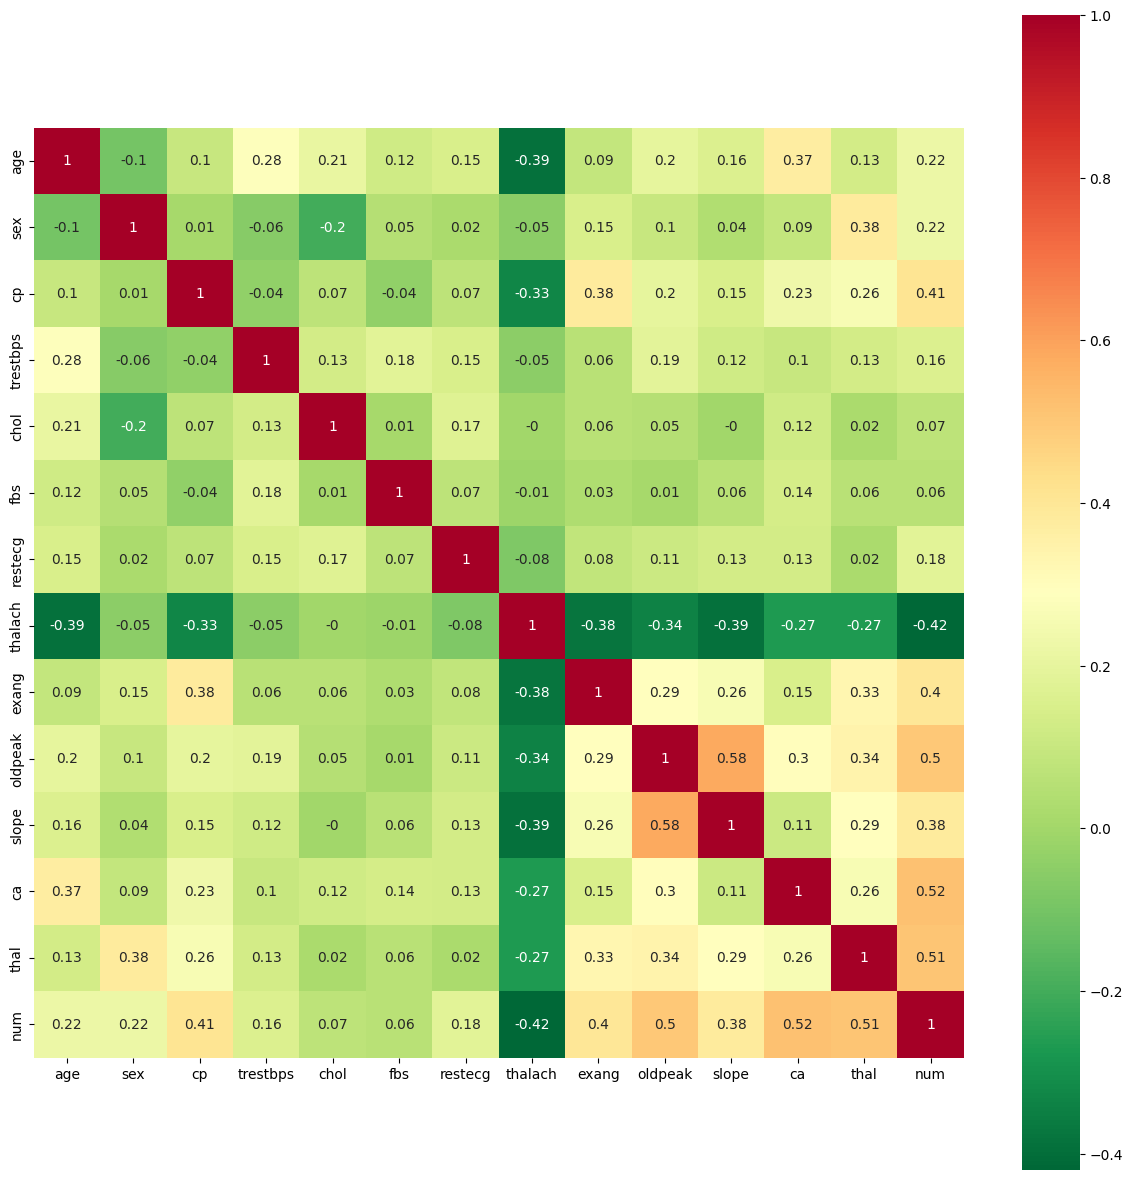

In [ ]:
# Correlation Heatmap
correlation = df.corr()
plt.subplots(figsize = (15,15))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

- tidak ada korelasi tinggi terhadap target. (batasan = 0.9)
- untuk konteks klasifikasi, yang dicari adalah korelasi antar fitur rendah

### penghapusan fitur yang bernilai konstan

In [ ]:
df = df.loc[:,df.apply(pd.Series.nunique) != 1]

In [ ]:
df

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   
302  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca  thal  num  
0      3.0  0.0   6.0    0  
1      2.0  3.0   3.0    2  
2      2.0  2.0   7.0    1  
3      3.0  0.0   3.0    0  
4      1.0  0.0   3.0    0  
..     ...  ...   ...  ...  
298    2.0  0.0   7.0    1  
299    2.0  2.0   7.0    2  
300    2.0  1.0   7.0    3  
301    2.0  1.0   3.0    1  
302    1.0  0.0   3.0    0  

[303 rows x 14 columns]

### penghapusan fitur berkorelasi tinggi

In [ ]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
data_tanpa_fitur = df.drop('num', axis=1)

In [ ]:
corr_features = correlation(data_tanpa_fitur, 0.8)
print('correlated features: ', len(set(corr_features)) )
print(corr_features)

correlated features:  0
set()


In [ ]:
# removed correlated  features
df.drop(labels=corr_features, axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


tidak ada fitur yang dihapus, karena tidak ada fitur yang memiliki korelasi tinggi melebihi 0.9

In [ ]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.663366   
std      0.994971   22.875003    0.469794    1.161075    0.616226    0.934375   
min      0.000000   71.000000    0.000000    0.000000    1.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    2.000000    0.000000   
75%      2.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    3.000000    3.000000   

             thal         num  
count  303.000000  303.000000  
mean     4.722772    0.937294  
std      1.938383    1.228536  
min      3.000000    0.000000  
25%      3.000000    0.000000  
50%      3.000000    0.000000  
75%      7.000000    2.000000  
max      7.000000    4.000000

### cek kembali korelasi

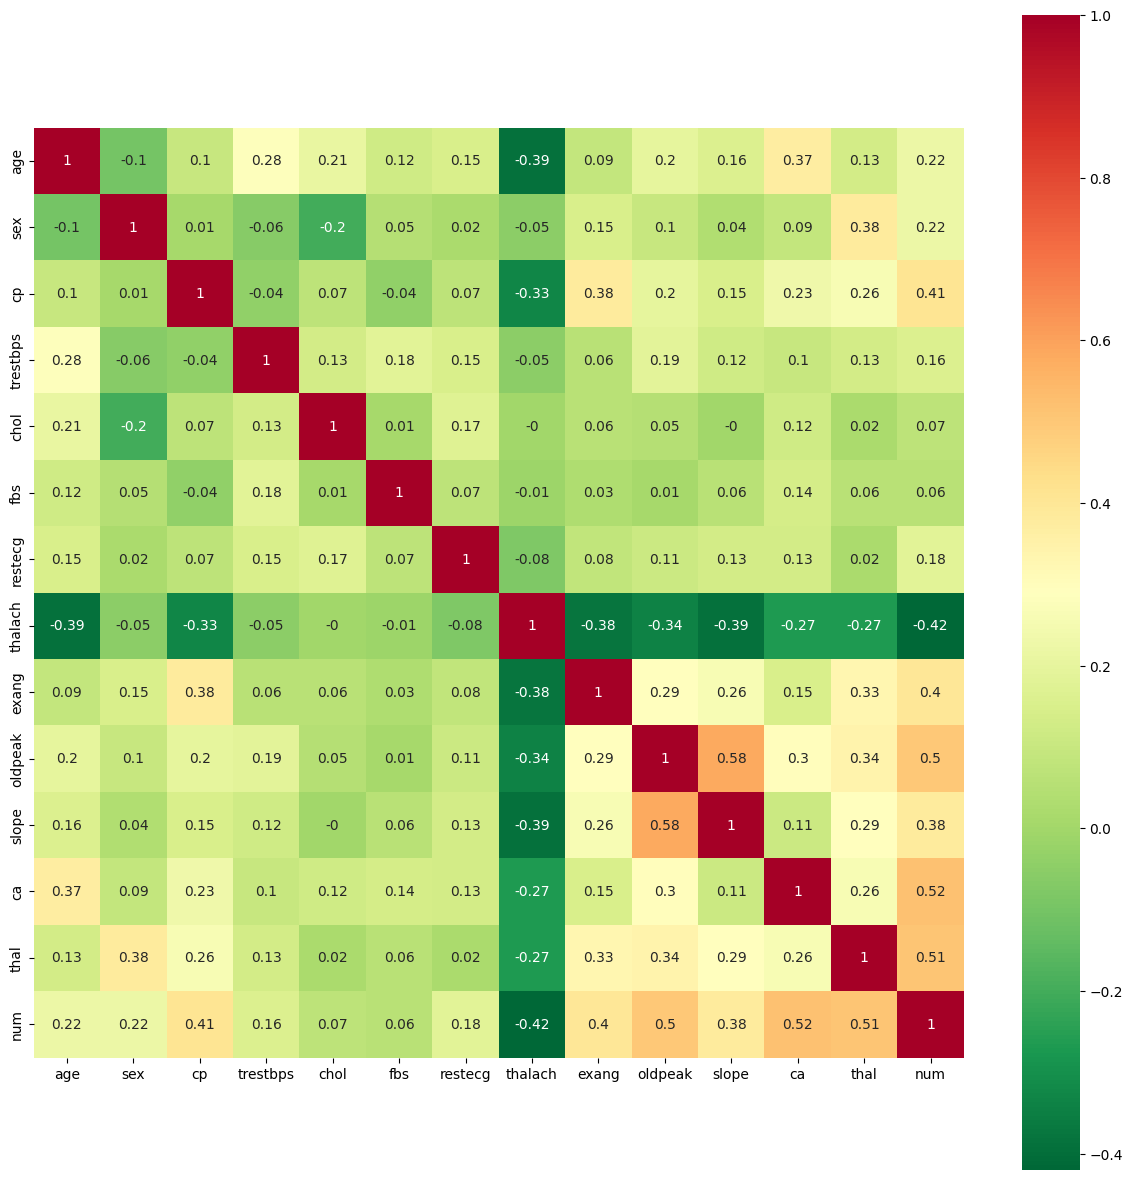

In [ ]:
# Correlation Heatmap
correlation = df.corr()
plt.subplots(figsize = (15,15))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

## BAB 7 – (J.62DMI00.010.1) menentukan label data

yang menjadi target adalah: 'num'

## BAB 8 – (J.62DMI00.013.1) membangun model

### persiapan data

In [ ]:
from sklearn.model_selection import train_test_split
# Pisahkan fitur dan target
X = df.drop('num', axis=1)
y = df['num']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

**1. test_size=0.1** berarti 10% data digunakan untuk pengujian (testing), sedangkan 90% data untuk pelatihan (training).

**2. random_state** memastikan pembagian data dilakukan secara acak, tetapi hasilnya reproducible (hasil yang sama setiap kali kode dijalankan).
- Jika random_state dihapus, pembagian data akan tetap acak, tetapi hasilnya akan berubah setiap kali Anda menjalankan kode.
- Jika angka random_state diganti (misalnya 7, 10, atau 99), pembagian data akan berubah, tetapi hasilnya tetap konsisten untuk angka tersebut.

### membangun dengan decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score,precision_score,classification_report, confusion_matrix

# Inisialisasi model
dt_model = DecisionTreeClassifier(random_state=42)

# Melatih model
dt_model.fit(X_train, y_train)

# Prediksi
y_pred_dt = dt_model.predict(X_test)

In [ ]:
# Evaluasi
print("Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test,y_pred_dt, average='micro'))
print('Recall:', recall_score(y_test,y_pred_dt, average='micro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Performance:
Accuracy: 0.5161290322580645
Precision: 0.5161290322580645
Recall: 0.5161290322580645

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.71      0.75        17
           1       0.38      0.50      0.43         6
           2       0.25      0.25      0.25         4
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1

    accuracy                           0.52        31
   macro avg       0.29      0.29      0.29        31
weighted avg       0.54      0.52      0.53        31



Hasil Decision Tree Performance seluruhnya (Accuracy, Precision, dan Recall) menunjukkan angka 0.516 (51.6%). Berarti:
- untuk akurasi, 51.6% dari total prediksi model adalah benar (seluruh kelas target). Karena dataset tidak seimbang (mayoritas adalah 0), accuracy saja tidak cukup untuk mengukur performa keseluruhan. Kita perlu melihat precision, recall, dan f1-score.
- Precision (51.6%) menunjukkan proporsi prediksi benar terhadap seluruh prediksi yang dibuat, secara rata-rata dari semua pasien yang diprediksi, 51.6% prediksinya benar.
- Recall menunjukkan proporsi sampel aktual yang terdeteksi dengan benar oleh model. Artinya, rata-rata 51.6% pasien yang berhasil dideteksi oleh model.

Classification report memberikan rincian performa per kelas.
- Kelas Mayoritas (0) menunjukkan model memiliki performa sangat baik untuk memprediksi pasien di kelompok ini, dengan Precision, Recall, dan F1-score semuanya diatas 50%.
- Kelas lainnya menunjukkan performa model untuk pasien lebih rendah dan cukup beragam, dimana nilai precision dibawah 50% mengartikan model sering salah memprediksi, dan recall mengartikan model gagal menangkap kategori pasien sebenarnya.

Model cukup baik secara keseluruhan (Accuracy 52%), namun masih cukup sulit diprediksi dengan performa optimal.

Dapat dilakukan percobaan penanganan ketidakseimbangan kelas, seperti oversampling (SMOTE) atau undersampling. Alasan mengapa model lebih baik di kategori 0 adalah karena tidak seimbangnya dataset, kelas mayoritas (0) lebih mendominasi dan lebih mudah diprediksi oleh model.

- hasil akurasi, presisi, recall memiliki nilai di range yang tinggi (disini 0.51), menunjukkan bahwa preprocessing yang kita gunakan sudah benar dan sesuai. Artinya kombinasi parameter yang dimasukkan sudah maksimal.

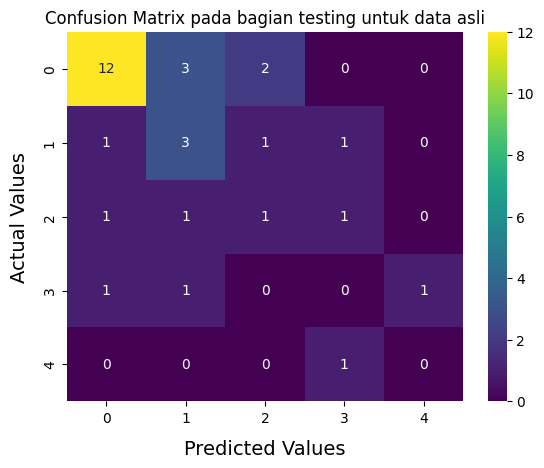

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred_dt),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

komponen-komponennya:

**Sumbu X: Predicted Values (Nilai Prediksi)**

0/1/2/3/4: Model memprediksi kateogori 0/1/2/3/4

**Sumbu Y: Actual Values (Nilai Sebenarnya)**

0/1/2/3/4: kateogori sebenarnya 0/1/2/3/4

Nilai dalam setiap sel:

- Kiri Atas (12): True Negatives (TN) - Benar diprediksi 0
 - Sebanyak 12 pasien sebenarnya kategori 0 dan model berhasi; memprediksi mereka sebagai kategori 0 dengan benar.

- Baris 1 kolom 2 (3) False Positives (FP) - Salah diprediksi kategori 1
 - Sebanyak 3 pasien sebenarnya tergolong kategori 0, tetapi model salah memprediksi mereka sebagai kategori 1.

- Kanan Bawah (0): True Positives (TP) - Benar diprediksi kategori 4
 - Sebanyak 0 pasien sebenarnya tergolong kategori 4 dan model memprediksi mereka sebagai tergolong kategori 4 dengan benar.

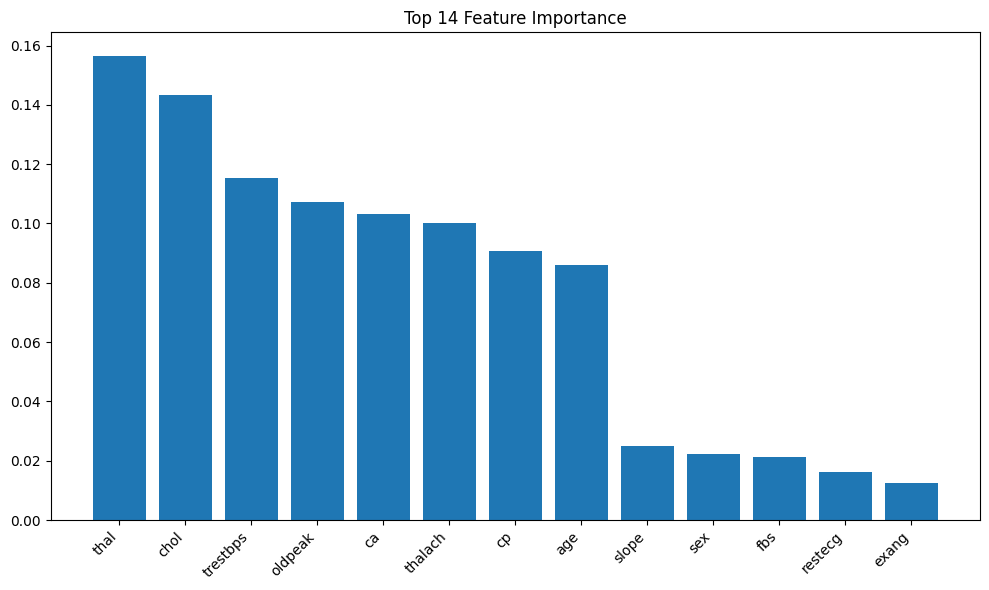

In [ ]:
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': dt_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
plt.bar(feature_importance['feature'][:14], feature_importance['importance'][:14])
plt.title('Top 14 Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Feature importance menunjukkan atau mengidentifikasi seberapa besar pengaruh masing-masing fitur terhadap prediksi model.

### hyperparameter tuning

proses mencari kombinasi nilai yang optimal untuk meningkatkan kinerja model.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Lakukan pencarian
grid_search.fit(X_train, y_train)

# Tampilkan parameter terbaik
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Gunakan model terbaik
best_dt_model = grid_search.best_estimator_

# Prediksi dengan model terbaik
y_pred_best_dt = best_dt_model.predict(X_test)

Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best cross-validation score: 0.5554882154882155


- Pada Best parameters, max_depth: 10 menunjukkan batas maksimum kedalaman pohon untuk menghindari overfitting, Setiap daun pohon minimal memiliki 4 sampel, dan minimal 10 sampel untuk membagi node.
- Best cross-validation score: 55.54%, menunjukkan bahwa model dengan parameter ini memiliki generalisasi yang sedikit lebih baik dibandingkan model awal.

In [ ]:
# Evaluasi model terbaik
print("\nBest Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_best_dt))
print("Precision:", precision_score(y_test,y_pred_best_dt, average='micro'))
print('Recall:', recall_score(y_test,y_pred_best_dt, average='micro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_dt))


Best Decision Tree Performance:
Accuracy: 0.45161290322580644
Precision: 0.45161290322580644
Recall: 0.45161290322580644

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.65      0.73        17
           1       0.00      0.00      0.00         6
           2       0.43      0.75      0.55         4
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1

    accuracy                           0.45        31
   macro avg       0.25      0.28      0.26        31
weighted avg       0.52      0.45      0.47        31



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Kesimpulan:
- Performa Model (Setelah Tuning): Accuracy, Precision, dan Recall 45.16% (lebih rendah dibandingkan sebelum tuning, yaitu 51.61%).
- Hyperparameter tuning menghasilkan pohon keputusan yang lebih terkontrol (pruned), sehingga lebih stabil model menjadi lebih stabil dengan skor cross-validation terbaik (55.54%).

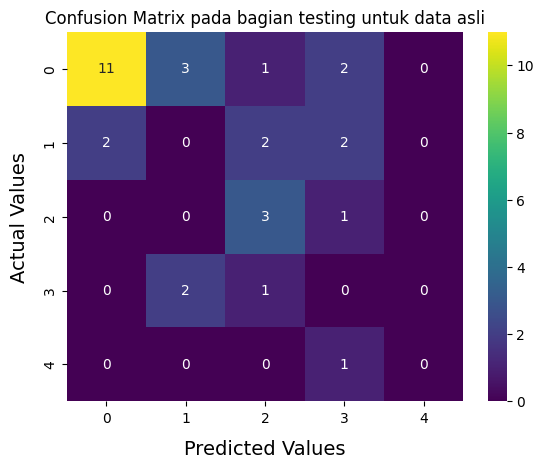

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred_best_dt),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

Kesimpulan: Dengan berfokus pada mendeteksi golongan pasien, model sebelum tuning sedikit lebih optimal atau lebih baik. Dengan kata lain, setelah tuning, model menjadi lebih baik secara keseluruhan, tetapi performa pada fokus utama (deteksi kategori pasien) justru menurun.

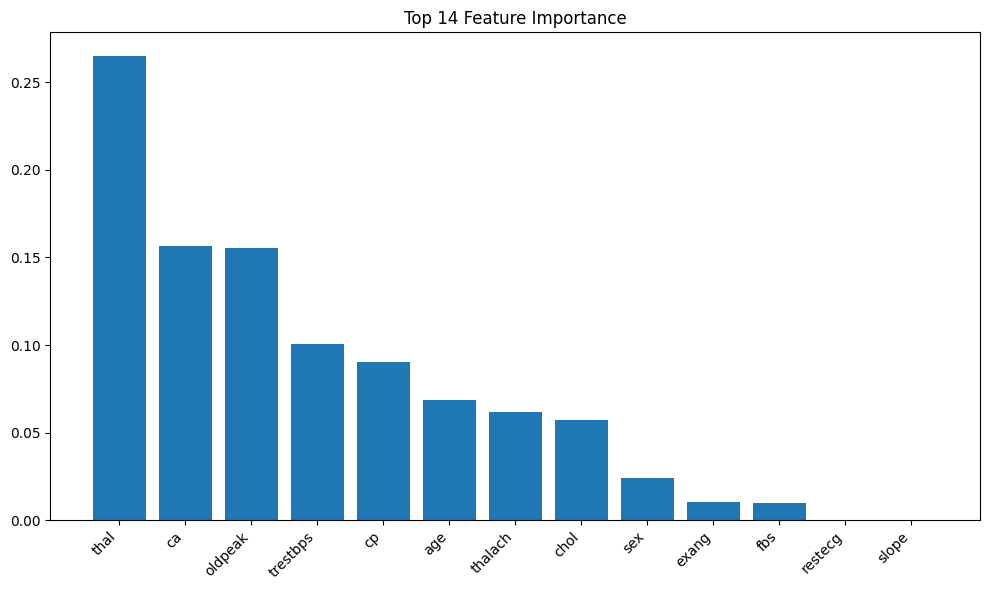

In [ ]:
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': best_dt_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
plt.bar(feature_importance['feature'][:14], feature_importance['importance'][:14])
plt.title('Top 14 Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### simpan model terbaik

In [ ]:
import joblib

# Simpan model terbaik
joblib.dump(best_dt_model, f'{folder_name}/best_hepatitis_predictor_model.joblib')
print("Model terbaik telah disimpan sebagai 'best_hepatitis_predictor_model.joblib'")

Model terbaik telah disimpan sebagai 'best_hepatitis_predictor_model.joblib'


## BAB 9 – (J.62DMI00.014.1) mengevaluasi hasil pemodelan
- GUNAKAN CEK UNDERFITTING DAN OVERFITTING DAN LEARNING CURVE

#### Membandingkan Akurasi Training vs Testing:

In [ ]:
from sklearn.metrics import accuracy_score

# Untuk model Decision Tree terbaik
y_train_pred = best_dt_model.predict(X_train)
y_test_pred = best_dt_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.7647058823529411
Testing Accuracy: 0.45161290322580644


Akurasi training (76.47%) lebih tinggi daripada akurasi testing (45.16), berarti model bekerja sangat baik pada data pelatihan, tetapi performanya menurun pada data uji. Kemungkinan terjadi overfitting (terlalu fokus pada detail dari data pelatihan).

#### learning curve

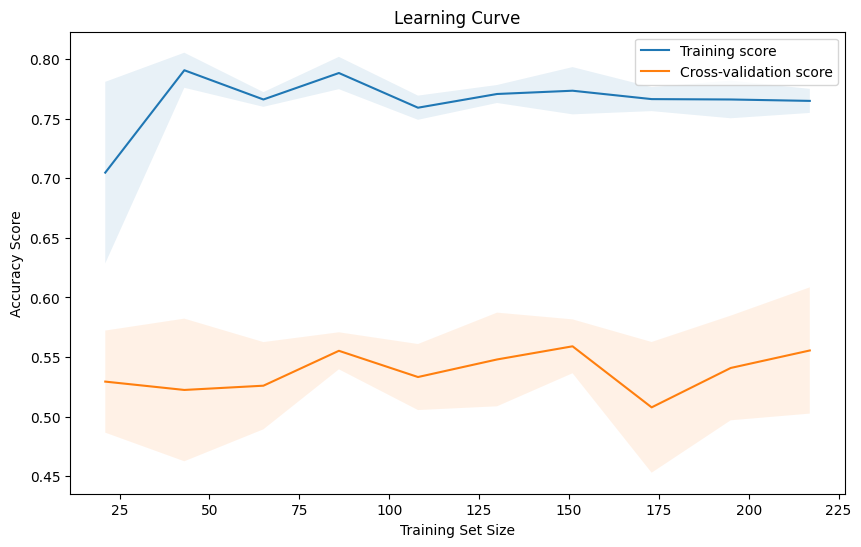

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    best_dt_model, X_train, y_train, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

Grafik learning curve diatas menunjukkan hubungan antara ukuran data pelatihan (sumbu X) dan akurasi model (sumbu Y), sesuai dengan hasil perbandingan Akurasi Training vs Testing.
- Garis training score (biru): menunjukkan performa model pada data pelatihan, dimana model sangat baik dalam mempelajari data pelatihan.
- Garis cross-validation score (orange): performa model pada data validasi, dimana nilainya lebih rendah dibandingkan data pelatihan.

#### cross validation score

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_dt_model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))
print("Standard deviation of CV score:", np.std(cv_scores))

Cross-validation scores: [0.45454545 0.56363636 0.61111111 0.57407407 0.57407407]
Mean CV score: 0.5554882154882155
Standard deviation of CV score: 0.0529917127506069


#### Complexity Curve (untuk Decision Tree):

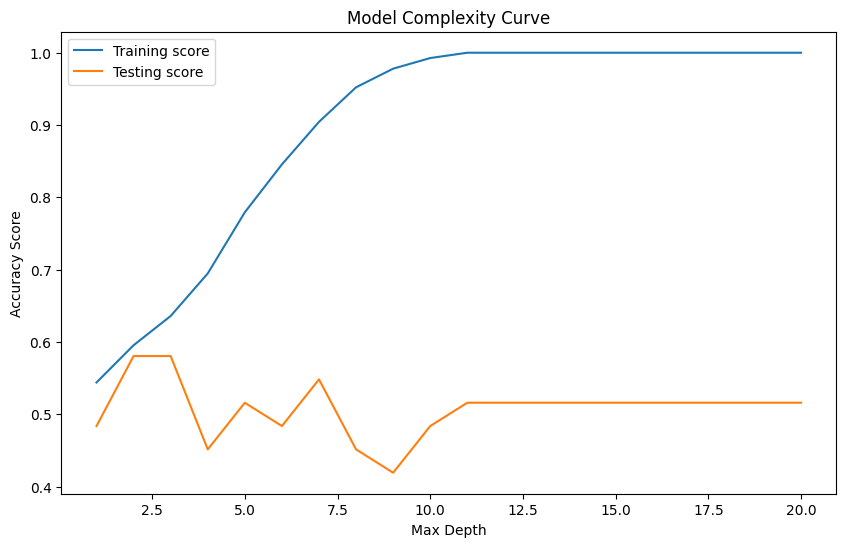

In [ ]:
max_depths = range(1, 21)  #digunakan untuk nilai integer dari 1 sampai 20
train_scores = []
test_scores = []

for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt.fit(X_train, y_train)
    train_scores.append(accuracy_score(y_train, dt.predict(X_train)))
    test_scores.append(accuracy_score(y_test, dt.predict(X_test)))

plt.figure(figsize=(10,6))
plt.plot(max_depths, train_scores, label='Training score')
plt.plot(max_depths, test_scores, label='Testing score')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.title('Model Complexity Curve')
plt.legend()
plt.show()

1. Sumbu X menunjukkan Max Depth atau tingkat kedalaman (depth) decision tree. Semakin besar nilai kedalaman, semakin kompleks modelnya.
2. Sumbu Y menunjukkan skor akurasi model, baik pada data training (garis biru) maupun data testing (garis oranye).

- Pada kedalaman kecil (misalnya, 2.5-7.5), garis training mengalami peningkatan dan testing menunjukkan grafik yang naik turun.
- Pada kedalaman sekitar 7.5-10, akurasi testing mencapai puncaknya, dan akurasi training masih naik-turun.
- Setelah kedalaman lebih dari 10, akurasi training terus meningkat mendekati 100% (overfitting ke data training). Namun, akurasi testing mulai stagnan, menunjukkan overfitting, yaitu model terlalu kompleks.

Sehingga, model yang optimal (Sweet spot (titik optimal)) berada di kedalaman sekitar 10, karena akurasi testing stabil pada rentang ini.

### visualisasi Decision tree versi standar

In [ ]:
from sklearn.tree import plot_tree

Gambar pohon keputusan telah disimpan sebagai 'decision_tree_visualization.png'


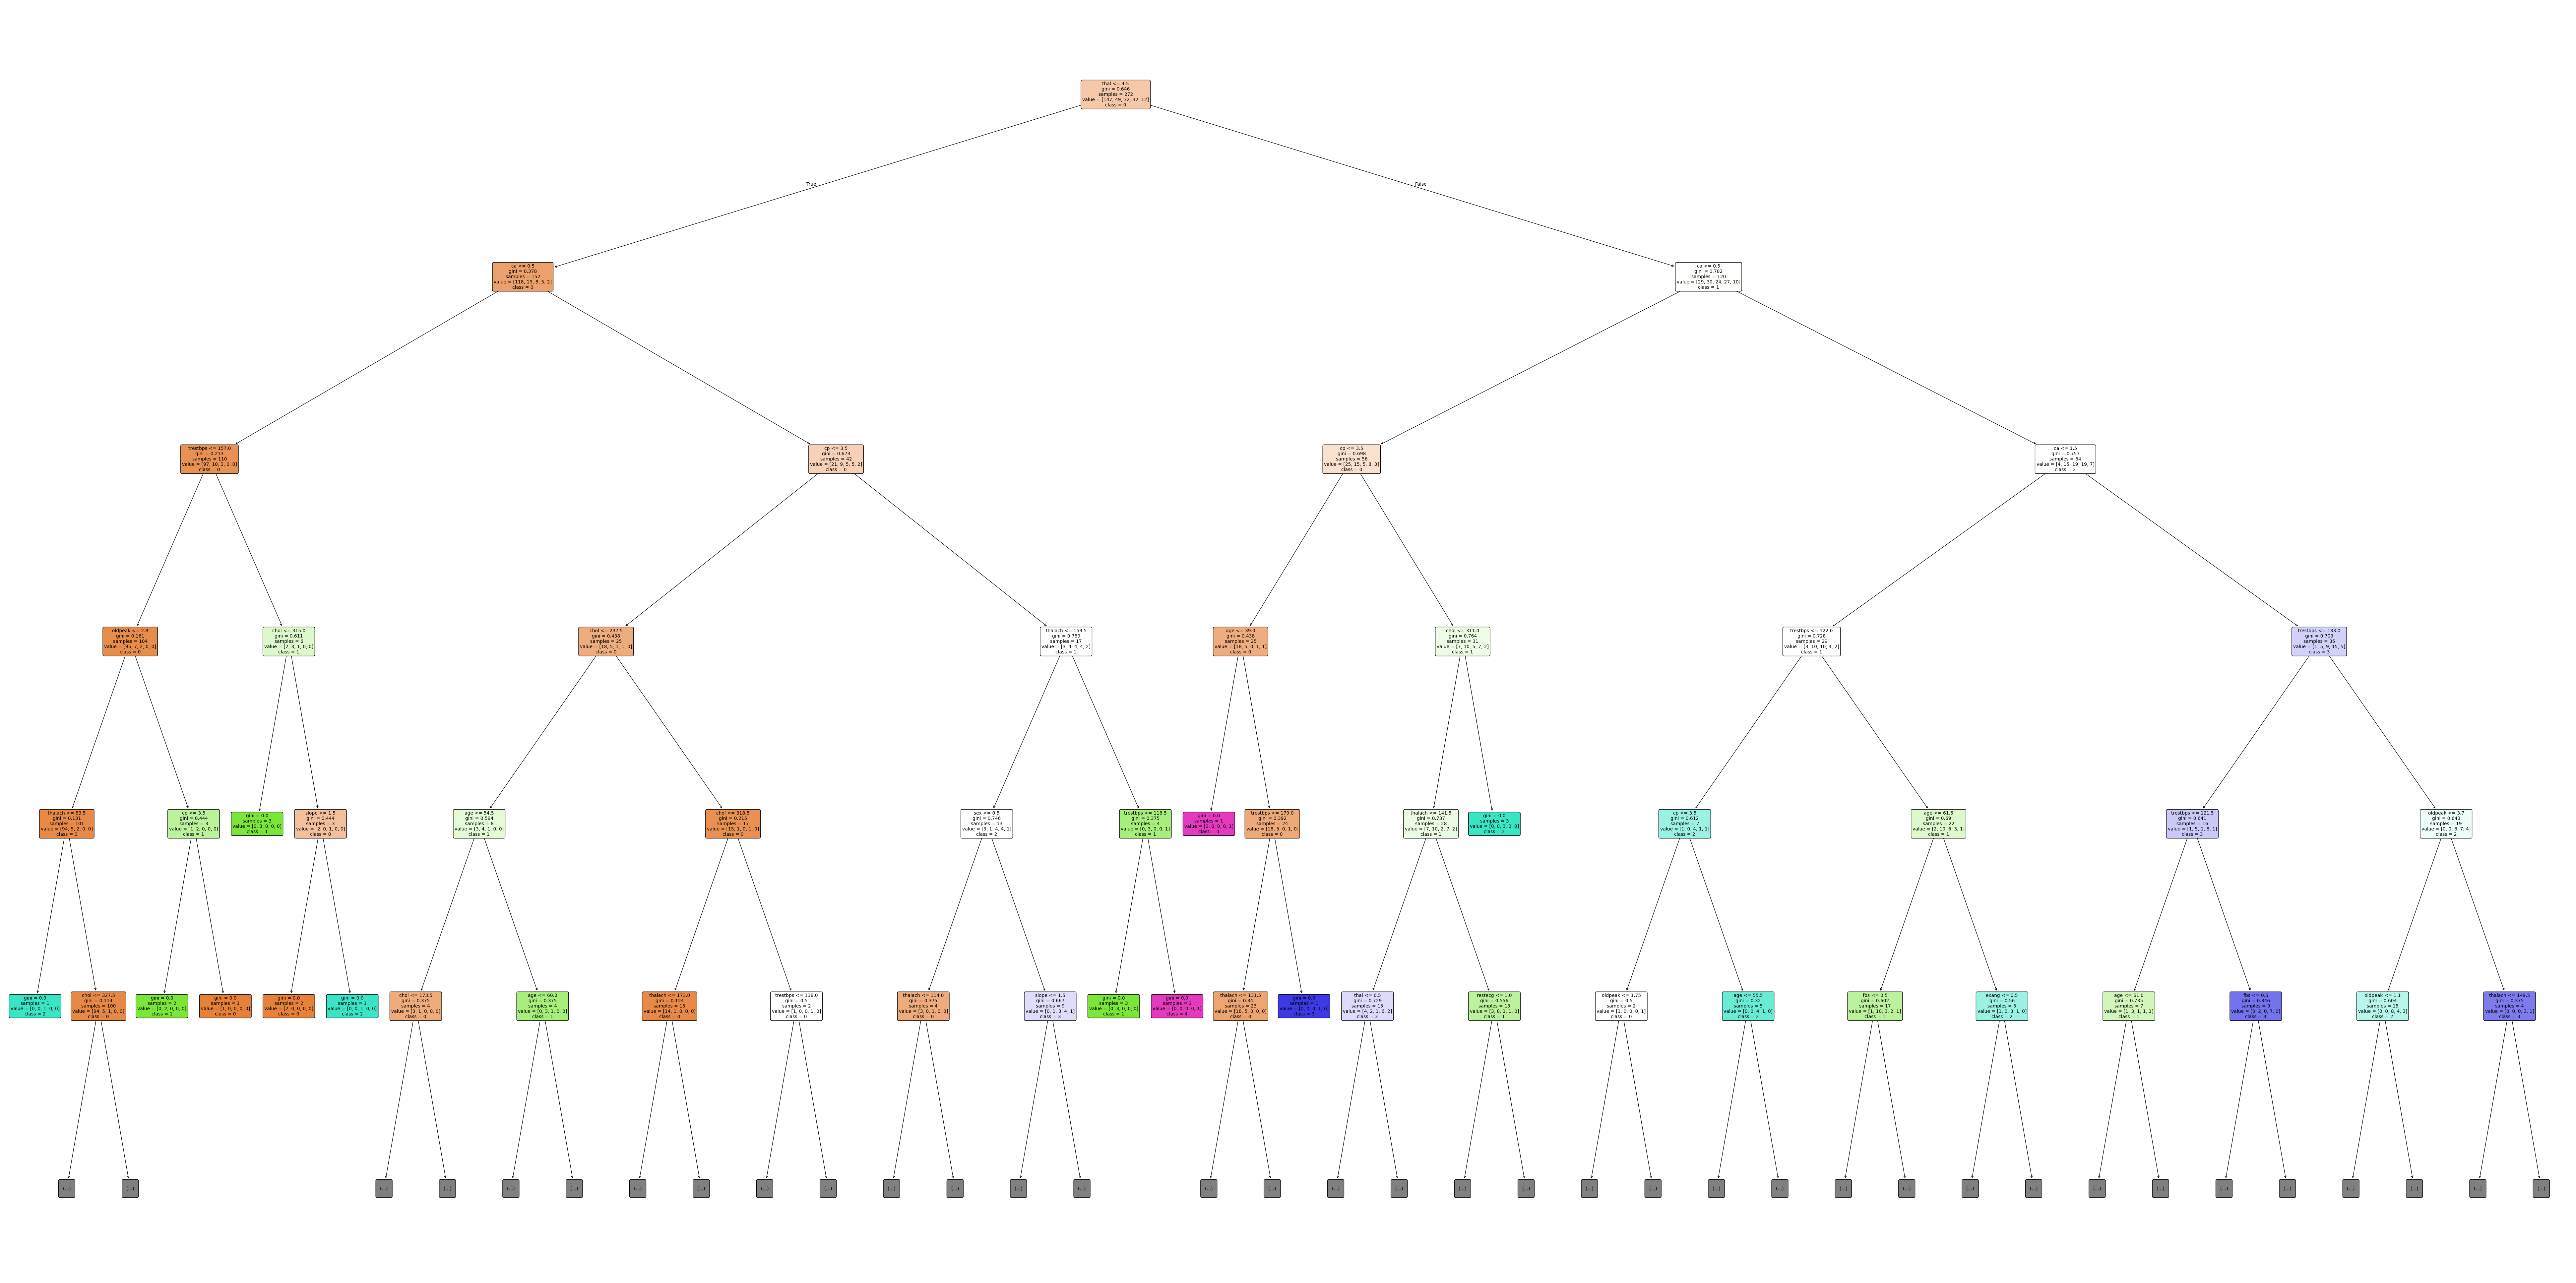

In [ ]:
# Buat gambar dengan ukuran yang sangat besar - disini maxdepth dibuat 5 agar lebih cepat terbuat
plt.figure(figsize=(100, 50))  # Ukuran dalam inci

# Plot pohon keputusan
plot_tree(dt_model, feature_names=X.columns, class_names=['0', '1', '2', '3', '4'],
          filled=True, rounded=True, fontsize=10, max_depth=5)

# Simpan gambar dengan DPI tinggi
plt.savefig(f'{folder_name}/decision_tree_visualization.png', dpi=300, bbox_inches='tight')

print("Gambar pohon keputusan telah disimpan sebagai 'decision_tree_visualization.png'")

Gambar pohon keputusan telah disimpan sebagai 'best_decision_tree_visualization.png'


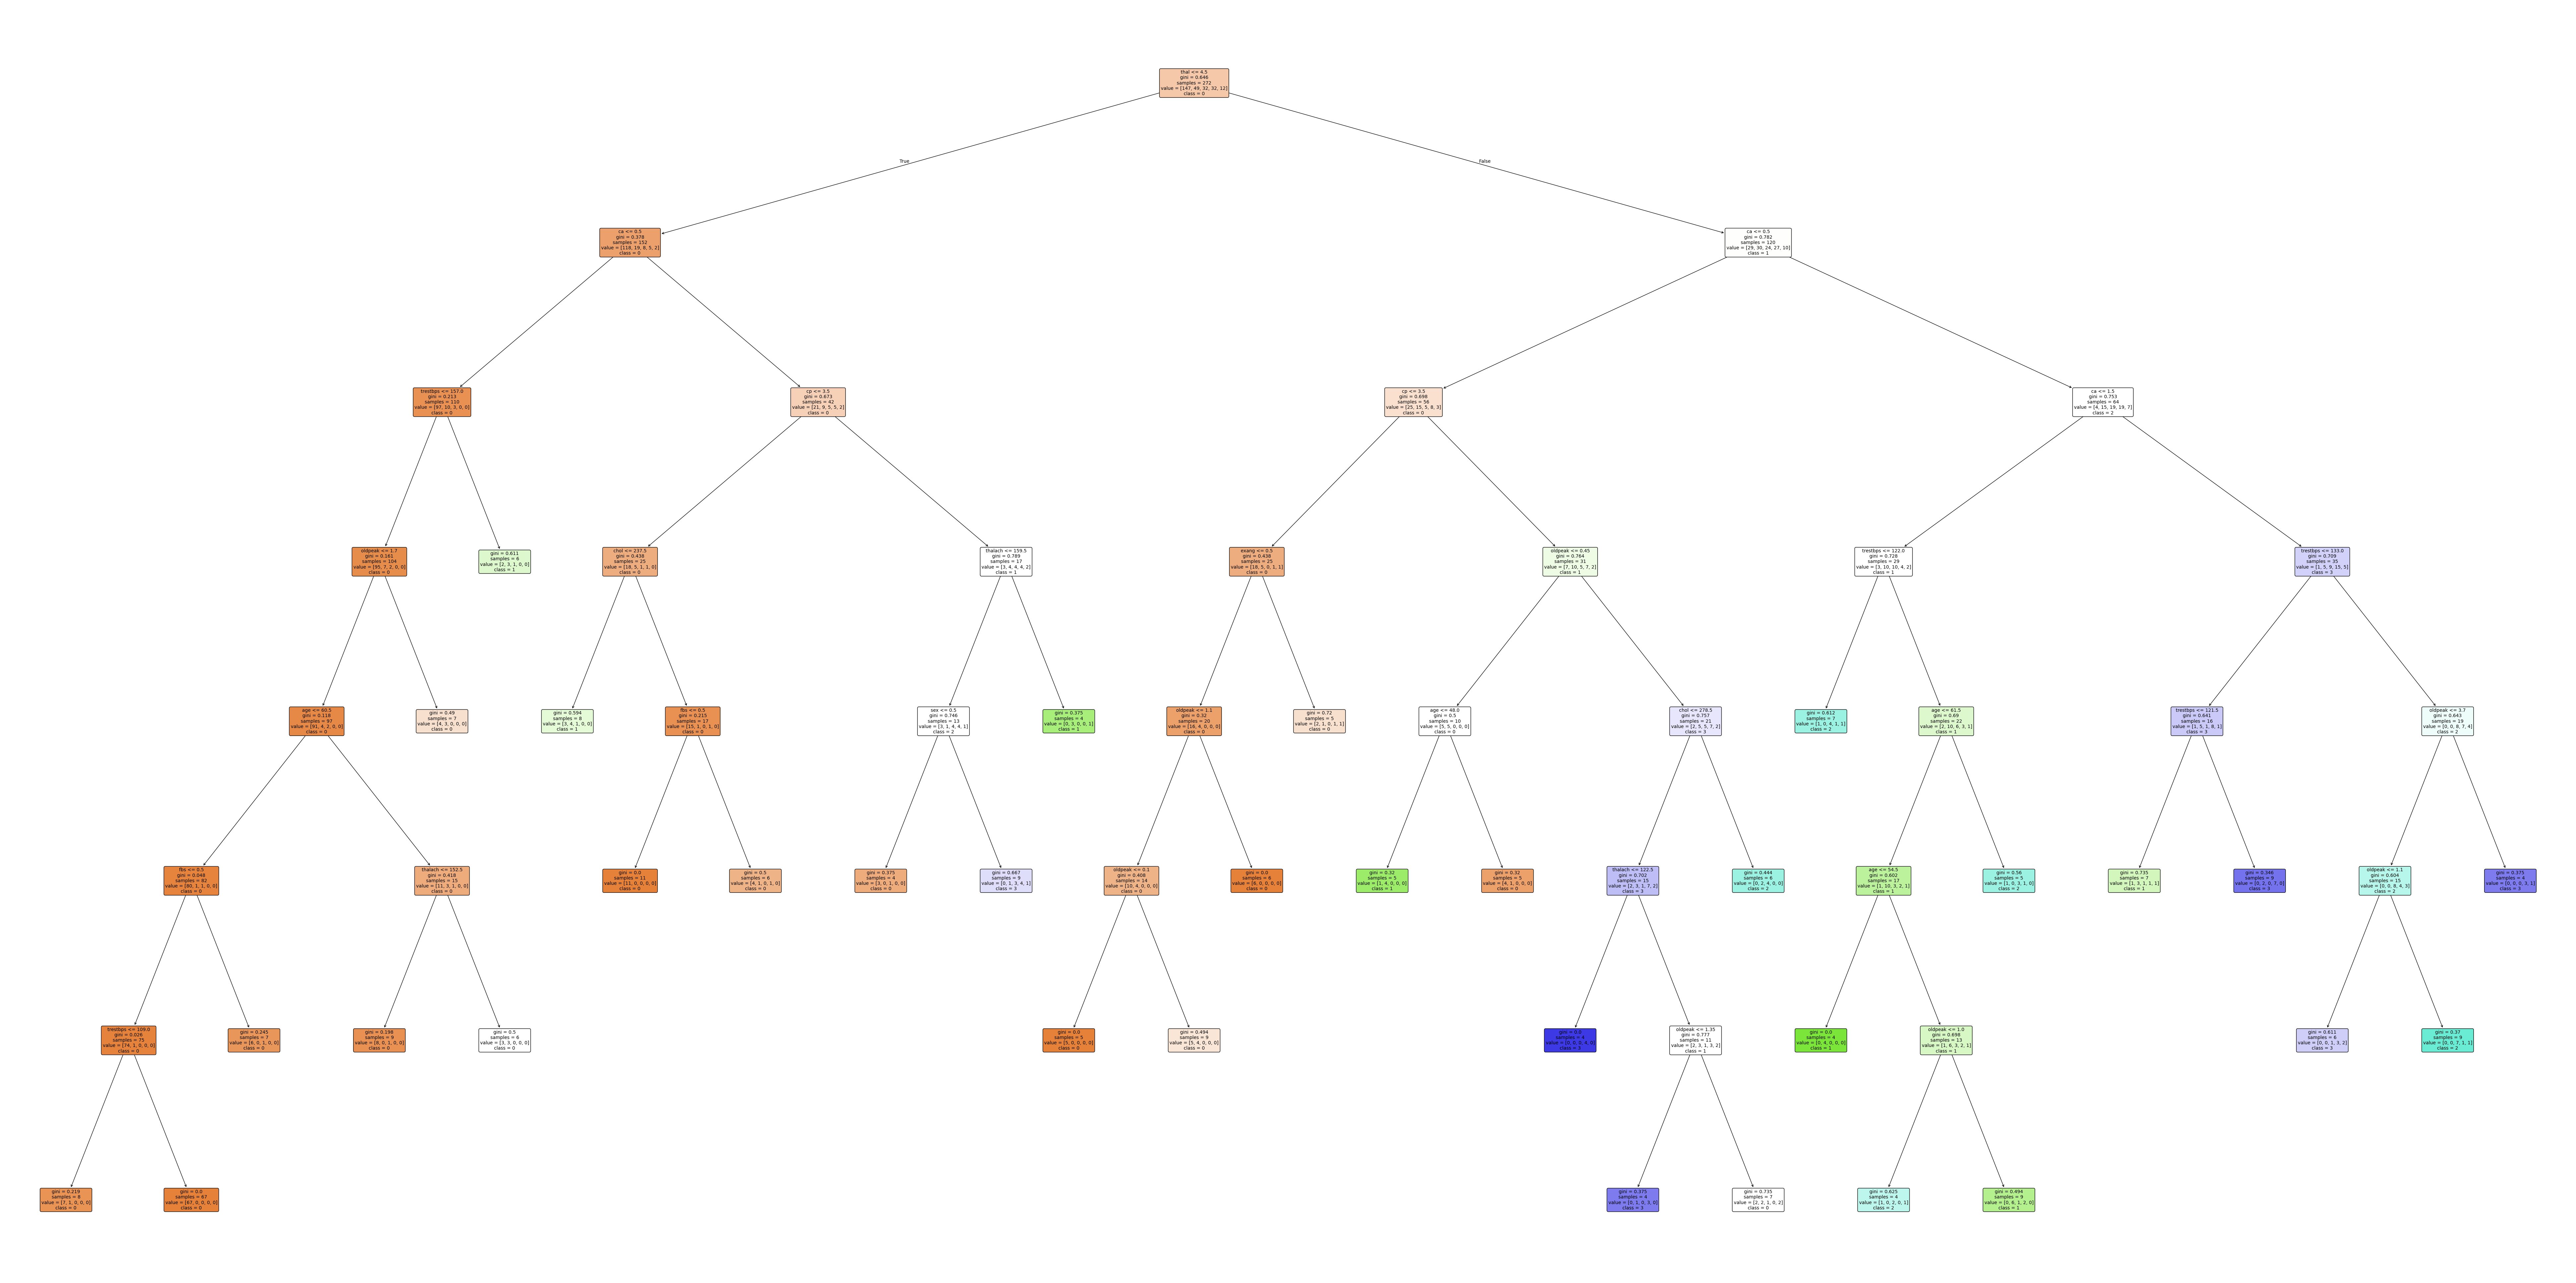

In [ ]:
# Buat gambar dengan ukuran yang sangat besar
plt.figure(figsize=(100, 50))  # Ukuran dalam inci

# Plot pohon keputusan
plot_tree(best_dt_model, feature_names=X.columns, class_names=['0', '1', '2', '3', '4'],
          filled=True, rounded=True, fontsize=10)

# Simpan gambar dengan DPI tinggi
plt.savefig(f'{folder_name}/best_decision_tree_visualization.png', dpi=300, bbox_inches='tight')

print("Gambar pohon keputusan telah disimpan sebagai 'best_decision_tree_visualization.png'")

<CENTER><b>-- SELESAI --</b></CENTER>